<h1><center>League of Xtraordinary Data Scientists :)</center></h1>
<h1><center>Deep Learning</center></h1>
<center>By: Heera Lal</center>

<h5><center>Comparison between TP, ML & DL</center></h5>

<img src="ml_dl1.svg" alt="Italian Trulli">

# Hand on Deep Learning

### Convert Celcius to Fahrenheit (°C to °F)

<img src="tmp.svg" alt="Italian Trulli">

<center>$ Fahrenheit = 1.8 * Celsius + 32 $<center>

### Single Neuron with Multiple Inputs

<img src="generic_model.jpeg" alt="Italian Trulli">

### Single Neuron with Single Input

<img src="our_model.svg" alt="Italian Trulli">

<center>$  ŷ = (w * x) + (1 * b)$<center>
<center>$ Fahrenheit = w * Celsius + b $<center>

In [1]:
import numpy as np
import random
import tensorflow as tf
print(tf.__version__)

2.6.0


### Data

In [2]:
Celsius = np.array([i*3 for i in range(100)])
Celsius[:10]

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [3]:
Fahrenheit = 1.8*Celsius + 32
Fahrenheit[:10]

array([32. , 37.4, 42.8, 48.2, 53.6, 59. , 64.4, 69.8, 75.2, 80.6])

### Model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units =1,input_shape=(1,)),
    ])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.get_weights()

[array([[-1.2583486]], dtype=float32), array([0.], dtype=float32)]

In [9]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.MeanSquaredError())

<center>$\mathit{MSE}=\frac{1}{m} \sum_{i=1}^m (y_{i}-ŷ_{i})^2 \\[2ex]$<center>

In [10]:
history = model.fit(Celsius, Fahrenheit, epochs=10000, verbose=0)

In [11]:
model.get_weights()

[array([[1.8000988]], dtype=float32), array([32.0002], dtype=float32)]

In [12]:
w, b = model.get_weights()
print(f"model weight w = {w[0]}")
print(f"model weight b = {b}")

model weight w = [1.8000988]
model weight b = [32.0002]


### Prediction

In [13]:
C = 100
pred = model.predict([C])
print("Model Prediction : ",pred[0])
F = 1.8*C + 32
print("Rule based or Actual : ",F)

Model Prediction :  [212.01007]
Rule based or Actual :  212.0


### Error plots

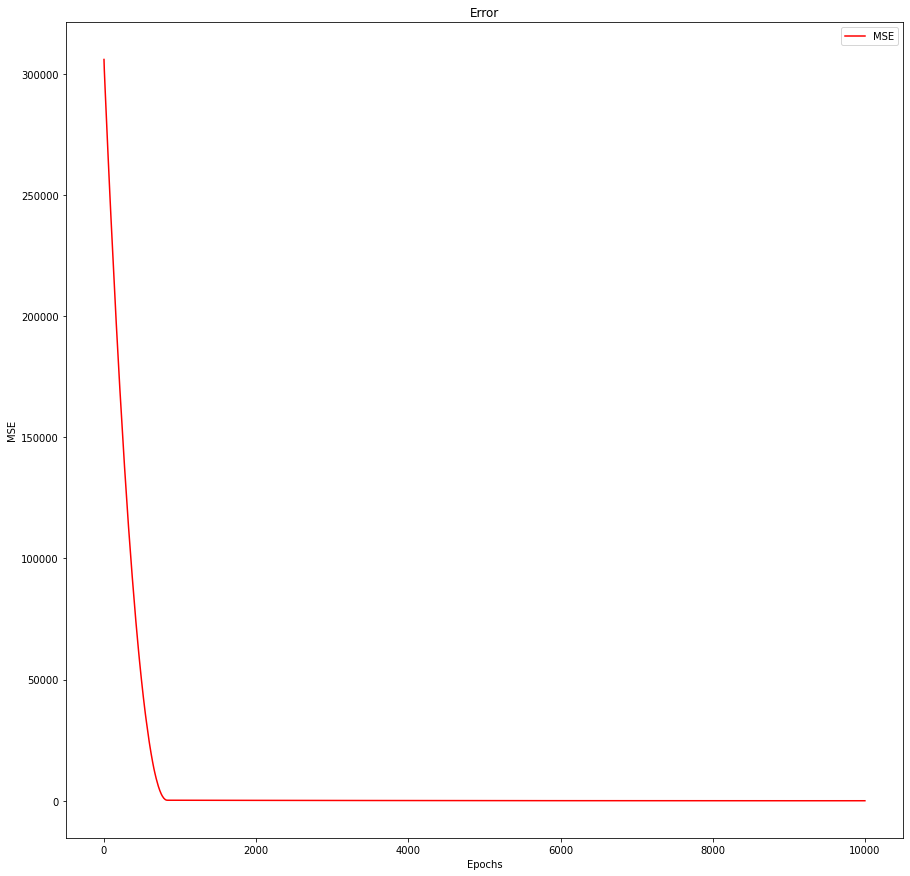

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
loss = history.history['loss']
epochs = [i for i in range(len(loss))]
plt.figure(figsize=(15,15))
plt.plot(epochs, loss, 'r', label='MSE')
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(loc=0)
plt.figure()
plt.show()

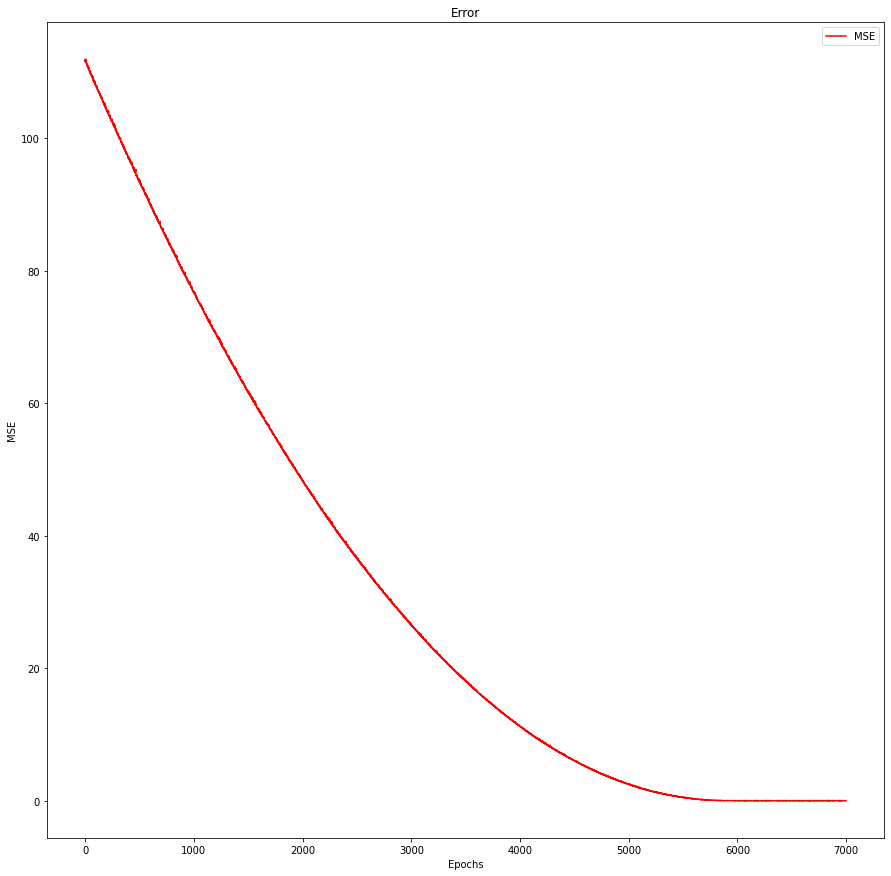

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss'][-7000:]
epochs = [i for i in range(len(loss))][-7000:]
plt.figure(figsize=(15,15))
plt.plot(epochs, loss, 'r', label='MSE')
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(loc=0)
plt.figure()
plt.show()

In [16]:
l0 = tf.keras.layers.Dense(units =3,input_shape=(1,))
l1 = tf.keras.layers.Dense(units =2)
l2 = tf.keras.layers.Dense(units =1)
model = tf.keras.Sequential([l0,l1,l2
    ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.get_weights()

[array([[ 0.8198699 , -0.11198187,  0.8319751 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.9887366 , -0.3250836 ],
        [-0.9540226 , -0.19398475],
        [ 0.23783779, -0.04088759]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.2781453 ],
        [-0.42716604]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [19]:
history = model.fit(Celsius, Fahrenheit, epochs=10000, verbose=0)

In [20]:
model.get_weights()

[array([[ 0.856701  , -0.15320106,  0.8516813 ]], dtype=float32),
 array([ 5.427155 , -5.4373016,  5.413707 ], dtype=float32),
 array([[ 1.211859  , -0.5517211 ],
        [-1.6218727 ,  0.47745103],
        [ 0.45845827, -0.26502922]], dtype=float32),
 array([ 5.4373198, -5.439809 ], dtype=float32),
 array([[ 0.6730816 ],
        [-0.87042177]], dtype=float32),
 array([5.4468875], dtype=float32)]

In [21]:
C = 100
pred = model.predict([C])
print("Model Prediction : ",pred[0])
F = 1.8*C + 32
print("Rule based or Actual : ",F)

Model Prediction :  [212.02954]
Rule based or Actual :  212.0


<h3><center>Thank You!!<center><h3>